# Web Scraping do Site do Decsi

Desenvolvido por **Caio Henrique Ferreira Pereira** e **Rian Lucas Dias Guedes**

O trabalho consiste em utilizar elementos da programação orientada a objetos para extrair dados dos sites de docentes da Universidade Federal de Ouro Preto (UFOP). Logo, foi utilizado o site do Departamento de Computação e Sistemas (DECSI) disponível no link: https://decsi.ufop.br/docentes.

Os sites de docentes das universidades costumam ser recursos valiosos para estudantes e pesquisadores em busca de informações sobre os professores que ministram aulas e conduzem pesquisas em diversas áreas. Esses sites geralmente incluem:

**Lista de Docentes:** Uma lista completa dos professores do departamento, com seus nomes, títulos acadêmicos, áreas de especialização e informações de contato.

**Currículos Lattes:** Muitas vezes, os perfis dos docentes incluem links para seus currículos Lattes, que fornecem detalhes sobre sua formação acadêmica, experiência profissional, publicações e projetos de pesquisa.

**Disciplinas e Horários de Aula:** Informações sobre as disciplinas que cada professor ministra, bem como os horários e locais das aulas.

**Linhas de Pesquisa:** Uma descrição das áreas de pesquisa em que os docentes estão envolvidos, juntamente com informações sobre projetos de pesquisa em andamento.

**Publicações e Trabalhos:** Listagens de artigos, livros, capítulos de livros e outras publicações dos docentes, juntamente com links para acessá-los, quando disponíveis.

**Atividades Acadêmicas e Profissionais:** Detalhes sobre participações em comitês, orientações de estudantes, palestras e outras atividades acadêmicas e profissionais.

**Informações de Contato:** Endereço de e-mail e informações de escritório para que os alunos e outros interessados possam entrar em contato com os docentes.

Os elementos a serem observados são:

**Herança:**
A herança é um dos pilares da programação orientada a objetos (POO) que permite criar novas classes baseadas em classes existentes. Em outras palavras, uma classe derivada (ou subclasse) pode herdar atributos e métodos de uma classe base (ou superclasse). Isso promove a reutilização de código e a criação de hierarquias de classes.

**Polimorfismo:**
O polimorfismo permite que objetos de classes diferentes possam ser tratados de maneira uniforme. Isso é alcançado através do uso de métodos com o mesmo nome em classes diferentes, mas com comportamentos específicos para cada classe. O polimorfismo permite escrever código mais genérico e flexível, pois você pode tratar objetos de diferentes classes de forma consistente.

**Encapsulamento:**
O encapsulamento é um conceito que envolve a proteção dos detalhes internos de uma classe e o acesso controlado aos seus membros. Isso é alcançado através do uso de modificadores de acesso, como público, privado e protegido. A ideia é ocultar a complexidade interna de uma classe e fornecer uma interface pública que permita a interação com os objetos dessa classe de forma segura e controlada. Isso ajuda a prevenir acesso não autorizado e facilita a manutenção do código.

**Abstração:**
A abstração é o processo de simplificar complexidades desnecessárias, focando nos aspectos mais relevantes de um objeto ou sistema. Em programação orientada a objetos, a abstração envolve a criação de classes e objetos que representam entidades do mundo real de forma simplificada.

# Importação de Bibliotecas

A importação de bibliotecas desempenha um papel fundamental no processo de web scraping, uma técnica amplamente utilizada para extrair dados de sites da web de forma automatizada. Para realizar com eficiência essa tarefa, os desenvolvedores frequentemente importam bibliotecas como BeautifulSoup e Requests em Python, que oferecem ferramentas poderosas para analisar a estrutura HTML das páginas da web e fazer requisições HTTP para recuperar seu conteúdo. Além disso, a escolha e importação adequadas dessas bibliotecas são passos cruciais para o sucesso do web scraping, permitindo aos desenvolvedores coletar dados valiosos de maneira eficaz e ética.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import re
import numpy as np  # Importe a biblioteca NumPy para formatação de eixos

print("bibliotecas carregadas com sucesso!!!")

bibliotecas carregadas com sucesso!!!


# Iniciando a Requisição

In [2]:
link = 'https://decsi.ufop.br/docentes'
requisição = requests.get(link)
site = BeautifulSoup(requisição.text, "html.parser")

print("Requisição concluída com sucesso!!!")

Requisição concluída com sucesso!!!


# Manipulação e Tratamento de Dados

In [3]:
# Encontre todos os links com o atributo "data-url"
lattes_links = site.find_all("a", {"data-url": True})

# Crie um conjunto para armazenar links únicos
links_unicos = set()

# Crie listas para armazenar os conteúdos e links "Lattes"
links_lattes = []

# Itere sobre os links encontrados
for lattes_link in lattes_links:
    link = lattes_link["data-url"]  # URL do link
    
    # Verifique se o link começa com "http://lattes.cnpq.br" e se não está repetido
    if link.startswith("http://lattes.cnpq.br") and link not in links_unicos:
        links_lattes.append(link)
        links_unicos.add(link)

# Crie um DataFrame pandas com os dados
data = {"Link Lattes": links_lattes}
df = pd.DataFrame(data)

# Imprima a tabela
print(df)

                               Link Lattes
0   http://lattes.cnpq.br/8764566527059268
1   http://lattes.cnpq.br/7235785605908373
2   http://lattes.cnpq.br/7297809559220807
3   http://lattes.cnpq.br/1643410432837277
4   http://lattes.cnpq.br/7492088859257796
5   http://lattes.cnpq.br/2814591013088400
6   http://lattes.cnpq.br/7592044829276098
7   http://lattes.cnpq.br/9843467186933551
8   http://lattes.cnpq.br/0077465042842971
9   http://lattes.cnpq.br/6433456044455782
10  http://lattes.cnpq.br/0477251811278890
11  http://lattes.cnpq.br/5705890373436314
12  http://lattes.cnpq.br/1647203174957503
13  http://lattes.cnpq.br/5992551198618807
14  http://lattes.cnpq.br/8575170301963726
15  http://lattes.cnpq.br/6902142517694851
16  http://lattes.cnpq.br/9307113126516652
17  http://lattes.cnpq.br/4706018137695087
18  http://lattes.cnpq.br/4677702535449517
19  http://lattes.cnpq.br/3527139618348914
20  http://lattes.cnpq.br/7605144807115470
21  http://lattes.cnpq.br/7643533390193970
22  http://

In [4]:
# Encontre todos os links de email
email_links = site.find_all("a", href=lambda href: href and href.startswith("mailto:"))

# Crie uma lista para armazenar os emails
emails = []

# Itere sobre os links de email encontrados e extraia os endereços de email
for link in email_links:
    email = link["href"].replace("mailto:", "")
    if email != "secretaria.decsi@ufop.edu.br" and email not in emails:
        emails.append(email)

# Ordene a lista de emails
emails.sort()

# Crie um DataFrame pandas com os endereços de email
data = {"Email": emails}
df = pd.DataFrame(data)

# Imprima a tabela
print(df)

                          Email
0   alexandre.sousa@ufop.edu.br
1            brhott@ufop.edu.br
2          bruno.ps@ufop.edu.br
3             bruno@ufop.edu.br
4       chgferreira@ufop.edu.br
5           darlan@ufrop.edu.br
6           eltonmc@ufop.edu.br
7             euler@ufop.edu.br
8        fboliveira@ufop.edu.br
9    filipe.ribeiro@ufop.edu.br
10           george@ufop.edu.br
11          gildaaa@ufop.edu.br
12          harlei@ufop..edu.br
13            helen@ufop.edu.br
14      igormuzetti@ufop.edu.br
15         janniele@ufop.edu.br
16         lucineia@ufop.edu.br
17      luiz.torres@ufop.edu.br
18           marlon@ufop.edu.br
19           mateus@ufop.edu.br
20      rfalexandre@ufop.edu.br
21      samuelbrito@ufop.edu.br
22           talles@ufop.edu.br
23          tatiana@ufop.edu.br
24             theo@ufop.edu.br
25     thiagoluange@ufop.edu.br
26      tiagolima@decsi.ufop.br
27    viniciusvdias@ufop.edu.br
28        vjpamorim@ufop.edu.br


In [5]:
# Encontre todos os elementos "span" com o estilo desejado
professores = site.find_all("span", style="color:#800000;")

# Crie uma lista para armazenar os conteúdos dos elementos "span"
conteudos = []

# Itere sobre os elementos encontrados e extraia o texto de cada um
for professor in professores:
    conteudo = professor.get_text()  # Obtém o texto dentro da tag span
    conteudos.append([conteudo])  # Adiciona o conteúdo à lista

# Use a biblioteca tabulate para criar uma tabela a partir dos conteúdos
tabela = tabulate(conteudos, headers=["Nome do Professor"], tablefmt="grid")

# Imprima a tabela
print(tabela)

+-------------------------------------+
| Nome do Professor                   |
+=====================================+
| Alexandre Magno de Souza            |
+-------------------------------------+
| Bruno Cerqueira Hott                |
+-------------------------------------+
| Bruno Pereira dos Santos            |
+-------------------------------------+
| Bruno Rabello Monteiro              |
+-------------------------------------+
| Carlos Henrique Gomes Ferreira      |
+-------------------------------------+
| Darlan Nunes de Brito               |
+-------------------------------------+
| Diego Zuquim Guimarães Garcia       |
+-------------------------------------+
| Eduardo da Silva Ribeiro            |
+-------------------------------------+
| Elton Máximo Cardoso                |
+-------------------------------------+
| Euler Horta Marinho                 |
+-------------------------------------+
| Fernando Bernardes de Oliveira      |
+-------------------------------------+


In [6]:
# Encontrar todas as tags que correspondem ao padrão
target_tags = site.find_all('span', style='font-family:Arial,Helvetica,sans-serif;')  # Encontrar todas as tags <span> com o estilo especificado

# Criar um conjunto para armazenar resultados únicos
results_set = set()

# Iterar pelas tags encontradas e adicionar seus conteúdos ao conjunto de resultados
for tag in target_tags:
    if tag.strong and 'Linha de pesquisa:' in tag.strong.text:
        content = tag.text.strip()  # Remover espaços em branco no início e no final
        if content and 'Linha de pesquisa:' in content:
            results_set.add(content)

# Converter o conjunto em uma lista para manter a ordem
results = list(results_set)

# Imprimir a tabela formatada
if results:
    print("Linha de pesquisa")
    for result in results:
        print(result)
else:
    print('Nenhum resultado encontrado.')


Linha de pesquisa
Linha de pesquisa: Inteligência Computacional aplicada à Otimização; Otimização Combinatória; Sistemas Web.
Linha de pesquisa: Linguagens de Programação.
Linha de pesquisa: Engenharia de Software.
Linha de pesquisa: Inteligência Computacional; Otimização Combinatória; Pesquisa Operacional.
Linha de pesquisa:
Linha de pesquisa: Redes Complexas, Aprendizado de Máquina, Comportamento do Usuário, Modelagem e Avaliação de Sistemas Computacionais.
Linha de pesquisa: Interface Cérebro-Computador, Interface Humano-Computador, Aprendizado de Máquina, Ciência de Dados, Engenharia de Software.
Linha de pesquisa: Redes de Computadores.
Linha de pesquisa: Visão computacional.
Linha de pesquisa: Programação Linear, Não-Linear e Mista, otimização combinatória e ciência dos dados.
Linha de pesquisa: Processamento Gráfico (Graphics).


# Resultados

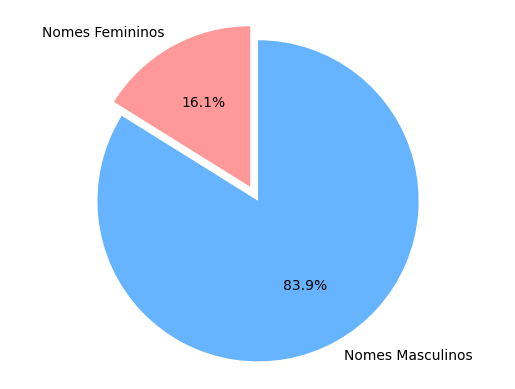

In [7]:
# Encontre todos os elementos "span" com o estilo desejado
professores = site.find_all("span", style="color:#800000;")

# Crie listas para armazenar os nomes femininos e masculinos
nomes_femininos = []
nomes_masculinos = []

# Itere sobre os elementos encontrados e extraia o texto de cada um
for professor in professores:
    conteudo = professor.get_text()  # Obtém o texto dentro da tag span
    palavras = conteudo.split()  # Divide o conteúdo em palavras
    if palavras:
        primeira_palavra = palavras[0]  # Obtém a primeira palavra
        # Verifica se a primeira palavra termina em "a", "en" ou "ele"
        if re.search(r'a$|en$|ele$', primeira_palavra):
            nomes_femininos.append(conteudo)
        else:
            nomes_masculinos.append(conteudo)

# Conta o número de nomes em cada categoria
quantidade_nomes_femininos = len(nomes_femininos)
quantidade_nomes_masculinos = len(nomes_masculinos)

# Cria um gráfico de pizza
labels = ['Nomes Femininos', 'Nomes Masculinos']
sizes = [quantidade_nomes_femininos, quantidade_nomes_masculinos]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode a primeira fatia (Nomes Femininos)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Mantém o aspecto igual para evitar distorções

# Exibe o gráfico de pizza
plt.show()

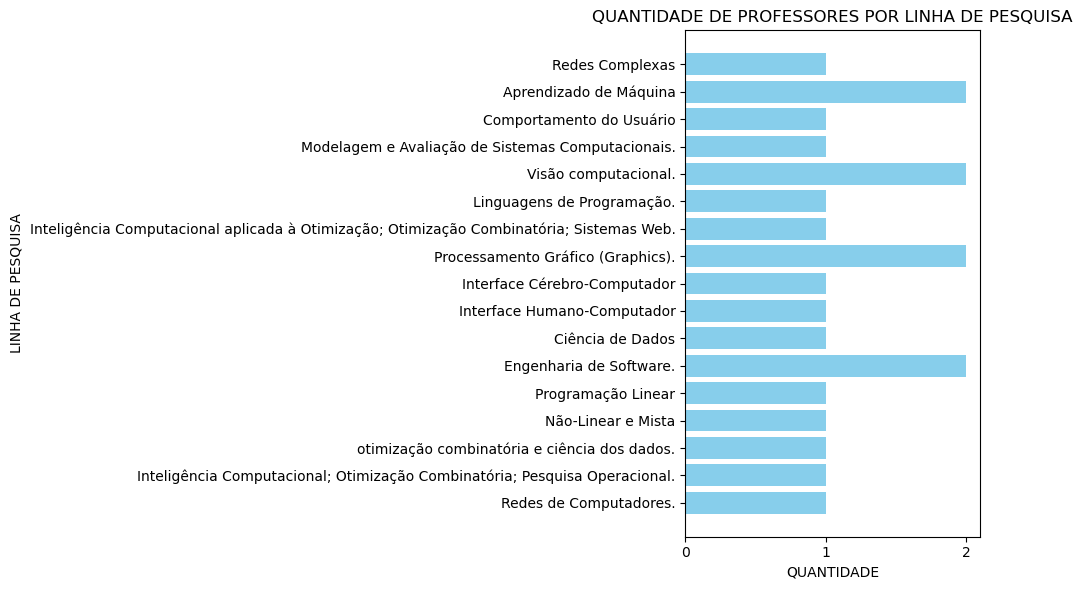

In [8]:
# Criar um dicionário para armazenar a contagem de ocorrências de cada linha de pesquisa
results_count = {}

# Iterar pelas tags encontradas e adicionar suas ocorrências ao dicionário
for tag in target_tags:
    if tag.strong and 'Linha de pesquisa:' in tag.strong.text:
        content = tag.text.strip()  # Remover espaços em branco no início e no final
        if content and 'Linha de pesquisa:' in content:
            # Remover a palavra "Linha de pesquisa:" e dividir a string por vírgula
            content = content.replace('Linha de pesquisa:', '')
            palavras = [palavra.strip() for palavra in content.split(',')]
            # Iterar pelas palavras e contar as ocorrências
            for palavra in palavras:
                if palavra:
                    # Verificar se a palavra já existe no dicionário
                    if palavra in results_count:
                        results_count[palavra] += 1
                    else:
                        results_count[palavra] = 1

# Criar listas separadas para as palavras-chave e suas contagens
palavras_chave = list(results_count.keys())
contagens = list(results_count.values())

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palavras_chave, contagens, color='skyblue')
plt.xlabel('QUANTIDADE')
plt.ylabel('LINHA DE PESQUISA')
plt.title('QUANTIDADE DE PROFESSORES POR LINHA DE PESQUISA')
plt.gca().invert_yaxis()  # Inverter a ordem das barras para mostrar a maior contagem no topo

# Configurar o eixo y para exibir números inteiros
plt.yticks(np.arange(len(palavras_chave)), palavras_chave)

# Formatando o rótulo do eixo x para não exibir números decimais
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()

# Mostrar o gráfico
plt.show()